In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Data Cleaning

In [74]:
data = pd.read_csv('amazon.csv')
# Check for duplicate, none found, no actions needed!
print(data.duplicated().sum())

#creating duplicate dataframe for EDA
cleanData1 = data.copy()

#checking data types of columns
cleanData1.dtypes

0


product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [75]:
#changing data type of discounted_price, actual_price, discount_percentage, rating and rating_count to datatype float
cleanData1['discounted_price'] = cleanData1['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
cleanData1['actual_price'] = cleanData1['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
cleanData1['discount_percentage'] = cleanData1['discount_percentage'].str.replace('%', '').astype(float)
non_numeric_mask = ~cleanData1['rating'].str.match(r'^-?\d*\.?\d+$')
cleanData1.loc[non_numeric_mask, 'rating'] = np.nan
cleanData1['rating'] = cleanData1['rating'].astype(float)
cleanData1['rating_count'] = cleanData1['rating_count'].str.replace(',', '').astype(float)

#adding discounted_amount column for additional insights
cleanData1['discounted_amount'] = cleanData1['actual_price'] - cleanData1['discounted_price']

#checking data types of each column
cleanData1.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
discounted_amount      float64
dtype: object

In [76]:
# for our own reference delete before submitting: no unusual value for rating so i didnt follow that part of the code

In [77]:
#checking for duplicates, no duplicates found
cleanData1[cleanData1.duplicated()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discounted_amount


In [78]:
#checking for missing values
#one row has column as na, need to remove that row
#ok for rating_count to be 0 since it means that no one has rated the product before current purchaser
cleanData1.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
discounted_amount      0
dtype: int64

In [79]:
#inspecting row with NaN rating value, rating column is indeed NaN
#using the product_link, I was able to find the rating of the missing data (3.9)
cleanData1[cleanData1['rating'].isna()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discounted_amount
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16.0,NaN,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...,400.0


In [80]:
#adding in the rating 3.9 for the unusual row
cleanData1['rating'].fillna(3.9, inplace=True)

#checking if data is placed correctly and no more NaN rows for rating
cleanData1.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
discounted_amount      0
dtype: int64

In [81]:
#adding main_category (the first category in 'category') and sub_category (the last category in 'category') columns to dataframe
cleanData1['main_category'] = cleanData1['category'].astype(str).str.split('|').str[0]
cleanData1['sub_category'] = cleanData1['category'].astype(str).str.split('|').str[-1]

In [82]:
#finding number of unique main_categories. total 9 unique categories
cleanData1['main_category'].nunique()

9

# EDA for Categories and Subcategories

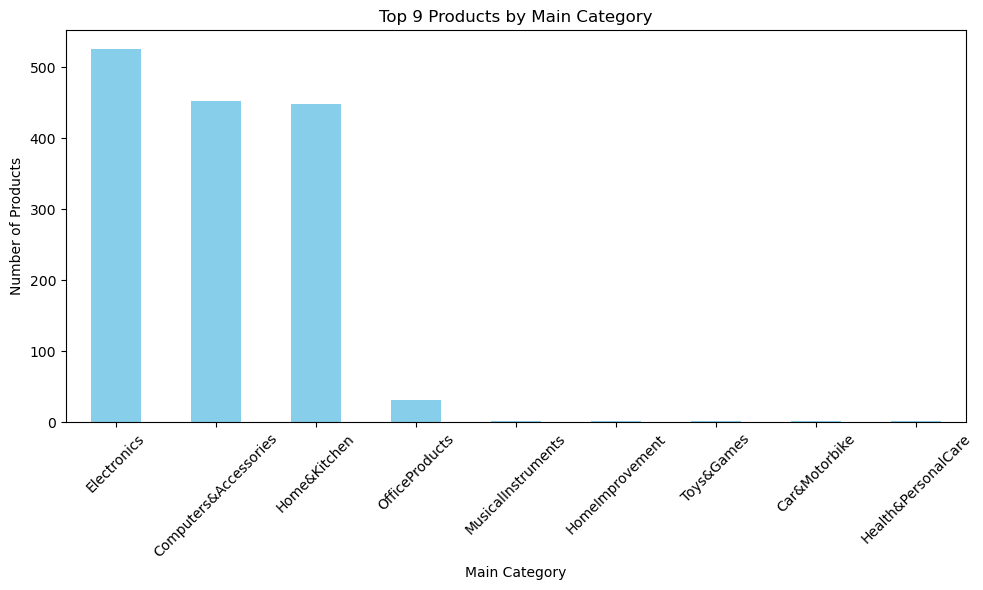

,Main Category,Count
0,Electronics,526
1,Computers&Accessories,453
2,Home&Kitchen,448
3,OfficeProducts,31
4,MusicalInstruments,2
5,HomeImprovement,2
6,Toys&Games,1
7,Car&Motorbike,1
8,Health&PersonalCare,1


In [83]:
#EDA
#Visualising distribution of Main_Category products through bar graph and table. It seems like the majority of products are within the main categories of Electronics, Computers&Accessories and Home&Kitchen.

#plotting bar graph
plt.figure(figsize=(10, 6))
cleanData1['main_category'].value_counts().head(9).plot(kind='bar', color='skyblue')
plt.title('Top 9 Products by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#creating table
category_counts = cleanData1['main_category'].value_counts()
top_9 = category_counts.head(9)
top_9_df = pd.DataFrame({'Main Category': top_9.index, 'Count': top_9.values})
top_9_df

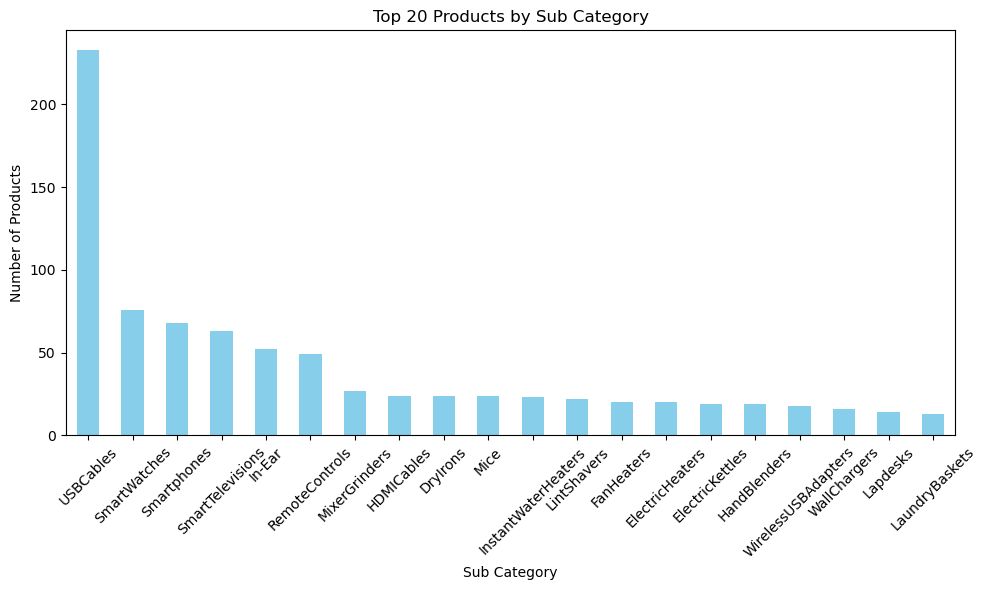

,Sub Category,Count
0,USBCables,233
1,SmartWatches,76
2,Smartphones,68
3,SmartTelevisions,63
4,In-Ear,52
5,RemoteControls,49
6,MixerGrinders,27
7,HDMICables,24
8,DryIrons,24
9,Mice,24


In [84]:
#EDA
#doing the same thing for sub_category

#finding number of unique sub_categories. Total 207 different sub_categories
cleanData1['sub_category'].nunique()

#USBCables is much higher than the rest
#plotting bar graph
plt.figure(figsize=(10, 6))
cleanData1['sub_category'].value_counts().head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Products by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#creating table
category_counts = cleanData1['sub_category'].value_counts()
top_30 = category_counts.head(20)
top_30_df = pd.DataFrame({'Sub Category': top_30.index, 'Count': top_30.values})
top_30_df

# EDA for Prices

Text(0, 0.5, 'Product Name')

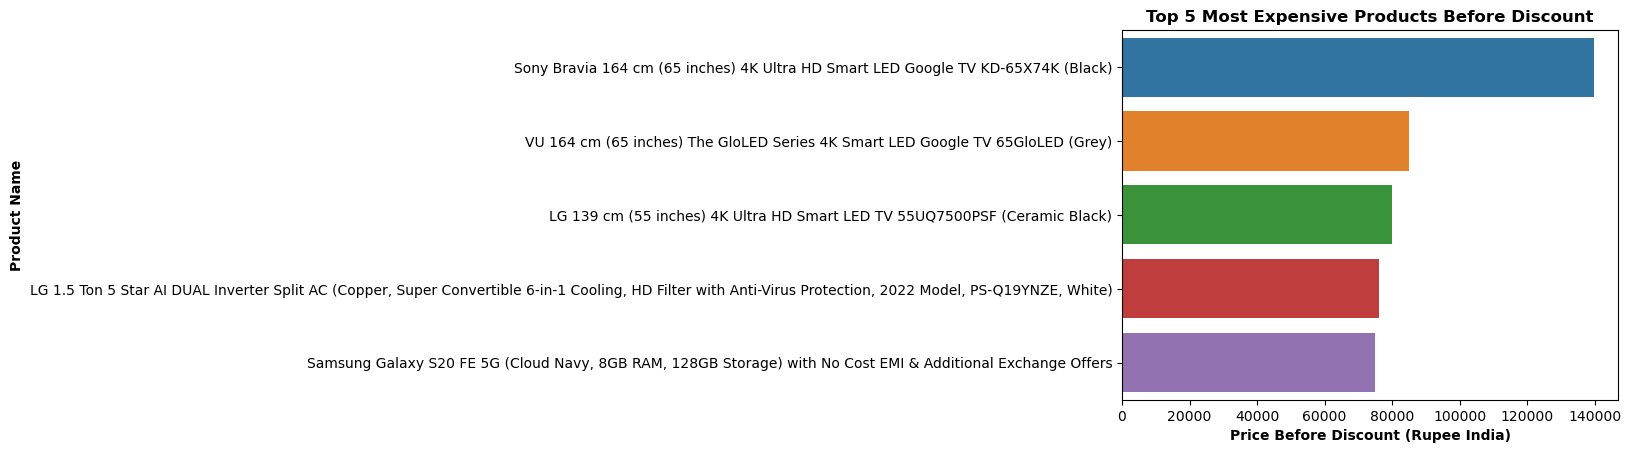

In [85]:
#EDA
#finding top 5 most expensive items before discount
mostex_b = sb.barplot(data=cleanData1.sort_values('actual_price', ascending=False).head(5), x='actual_price', y='product_name')
mostex_b.set_title('Top 5 Most Expensive Products Before Discount', fontweight='bold')
mostex_b.set_xlabel('Price Before Discount (Rupee India)', fontweight='bold')
mostex_b.set_ylabel('Product Name', fontweight='bold')


Text(0, 0.5, 'Product Name')

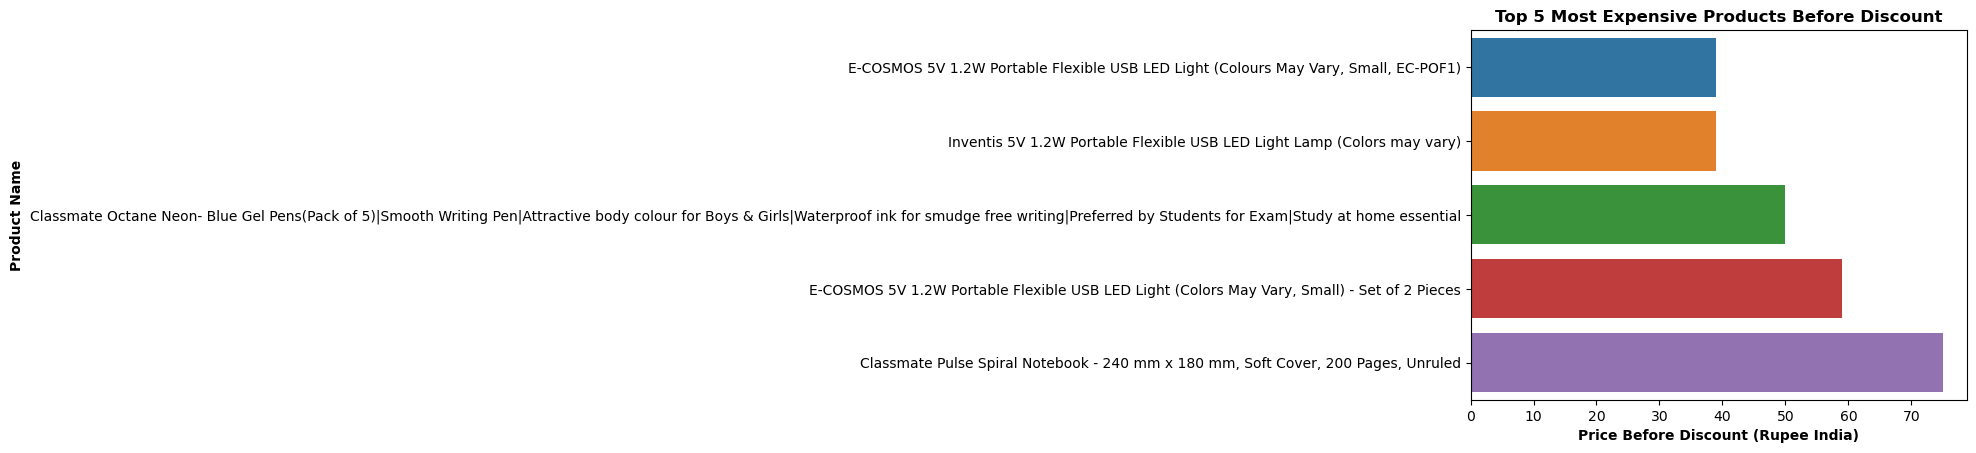

In [86]:
#EDA
#finding top 5 least expensive items before discount
leastex_b = sb.barplot(data=cleanData1.sort_values('actual_price', ascending=True).head(5), x='actual_price', y='product_name')
leastex_b.set_title('Top 5 Most Expensive Products Before Discount', fontweight='bold')
leastex_b.set_xlabel('Price Before Discount (Rupee India)', fontweight='bold')
leastex_b.set_ylabel('Product Name', fontweight='bold')


Text(0, 0.5, 'Product Name')

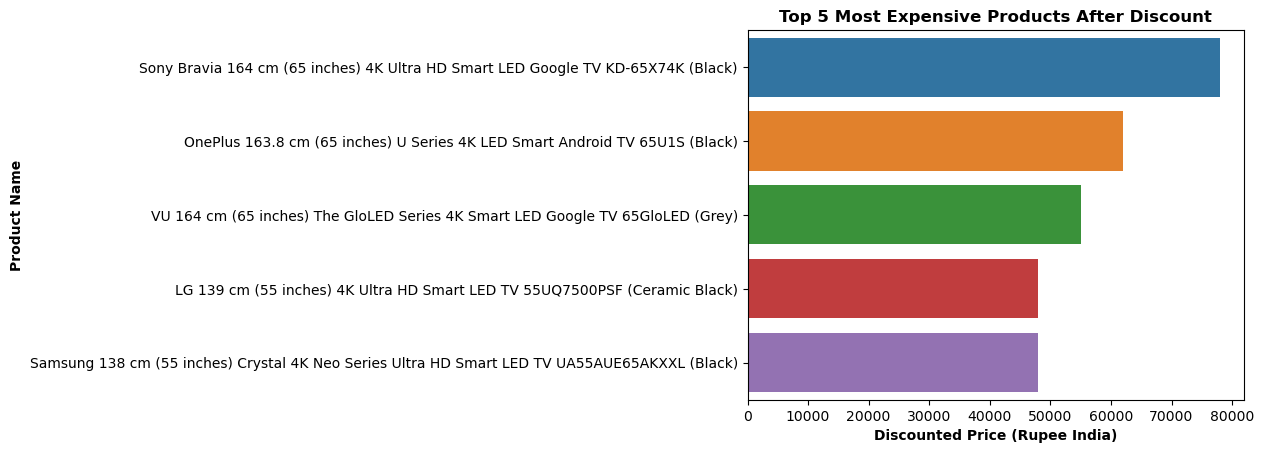

In [87]:
#EDA:
#finding top 5 most expensive items after discount
mostex_a = sb.barplot(data=cleanData1.sort_values('discounted_price', ascending=False).head(5), x='discounted_price', y='product_name')
mostex_a.set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
mostex_a.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
mostex_a.set_ylabel('Product Name', fontweight='bold')

Text(0, 0.5, 'Product Name')

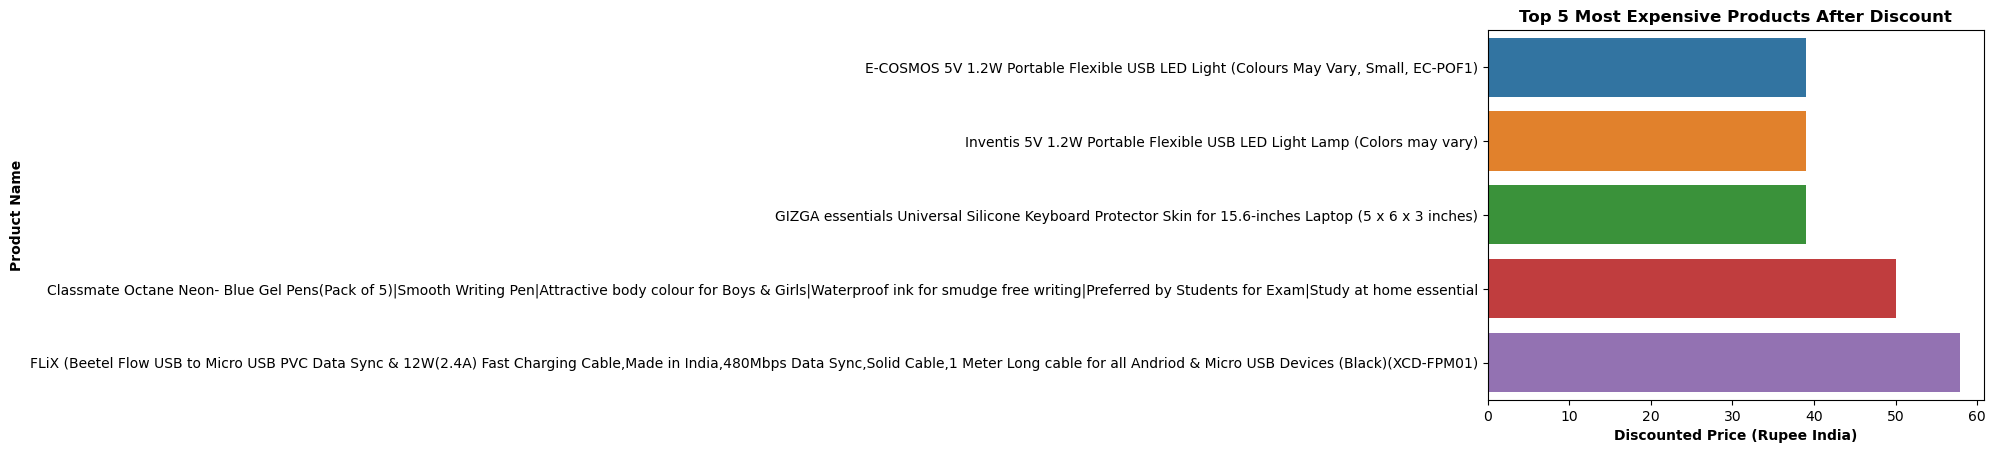

In [88]:
#EDA:
#finding top 5 least expensive items after discount
mostex_a = sb.barplot(data=cleanData1.sort_values('discounted_price', ascending=True).head(5), x='discounted_price', y='product_name')
mostex_a.set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
mostex_a.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
mostex_a.set_ylabel('Product Name', fontweight='bold')

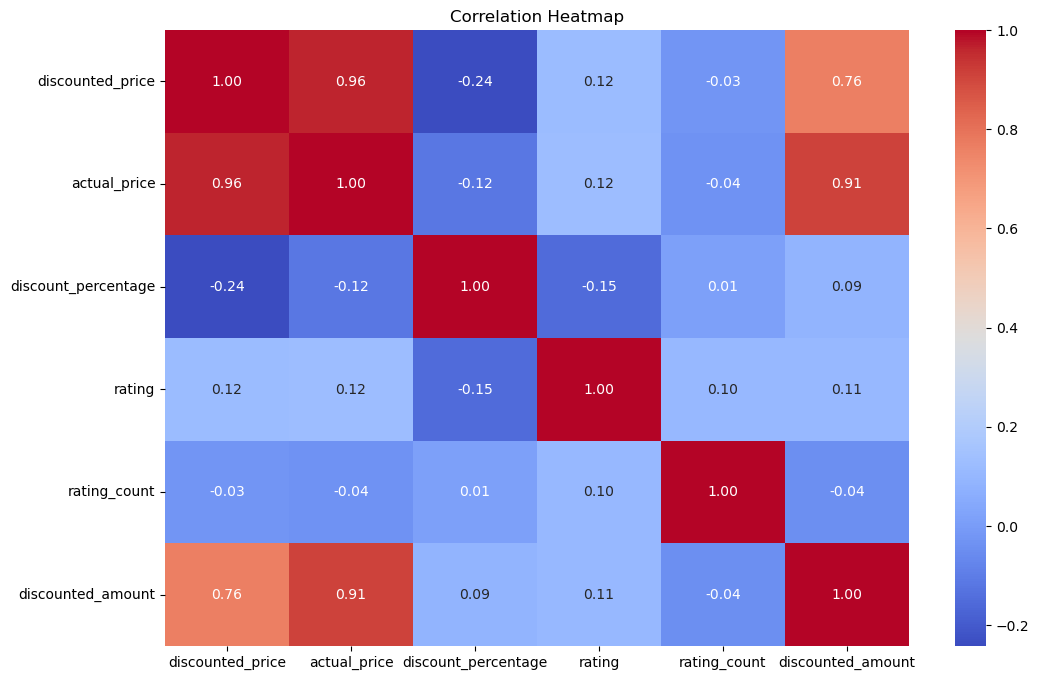

In [89]:
#EDA
#Finding correlation between different columns

cor = cleanData1[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'discounted_amount']]

plt.figure(figsize=(12, 8))
sb.heatmap(cor.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


<Axes: xlabel='actual_price', ylabel='discounted_price'>

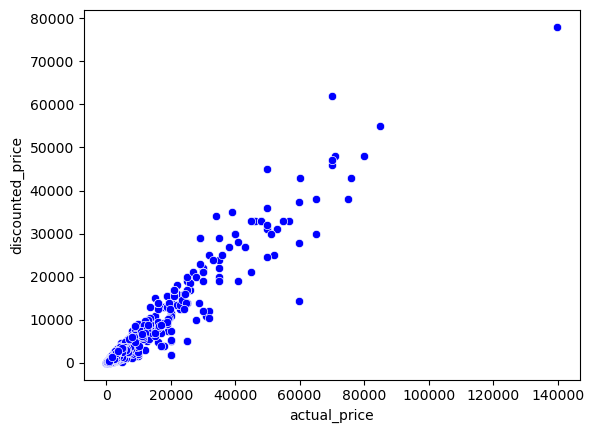

In [90]:
#EDA
#Finding correlation between actual and discounted price
sb.scatterplot(data=cleanData1, y='discounted_price', x='actual_price', color='blue')

# EDA for actual and discounted price

### There is high correlation (value=0.96) between actual price and discounted price, as seen in the scatterplot.


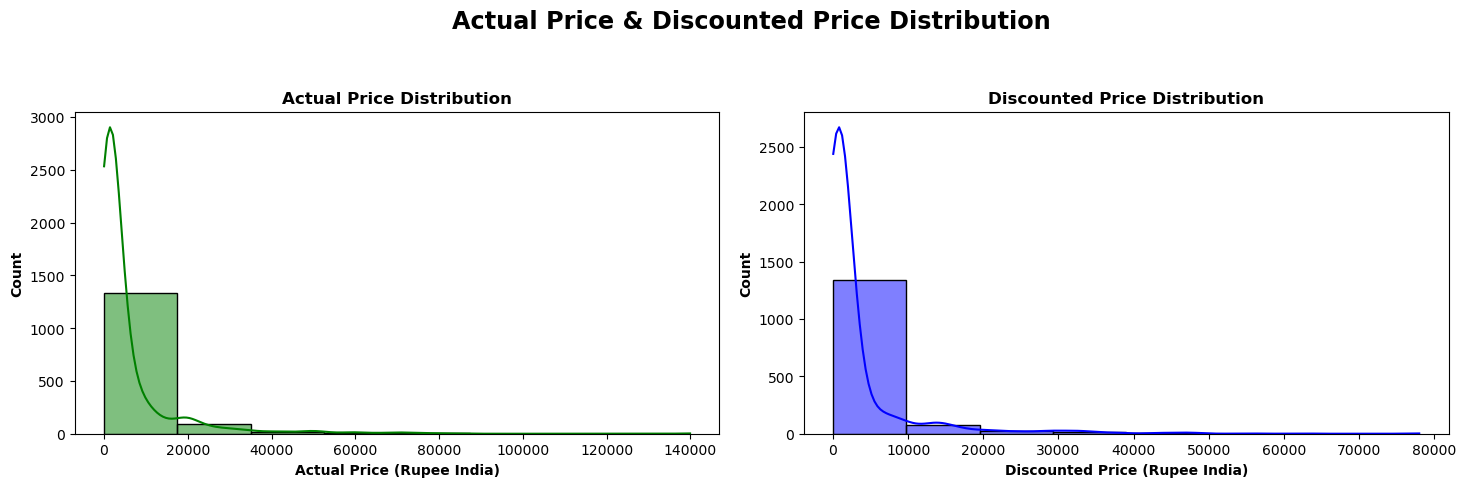

In [115]:
#Actual Price & Discounted Price Distribution

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Actual Price & Discounted Price Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sb.histplot(ax=ax[0], data=cleanData1, x='actual_price', bins=8, kde=True, color='green')
sb.histplot(ax=ax[1], data=cleanData1, x='discounted_price', bins=8, kde=True, color='blue')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Actual Price Distribution', fontweight='bold')
ax[1].set_title('Discounted Price Distribution', fontweight='bold')

plt.show()

### 20000 rupees is equivalent to roughly 350SGD. Not too expensive I guess
### We can try to reduce the range of the x axis?


### Both graphs are right skewed

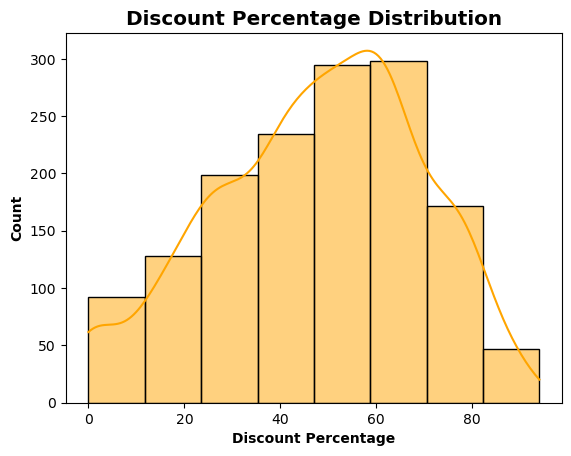

In [92]:
#Discount Percentage Distribution

disc_per = sb.histplot(data=cleanData1, x='discount_percentage', bins=8, kde=True, color='orange')


disc_per.set_xlabel('Discount Percentage', fontweight='bold')
disc_per.set_ylabel('Count', fontweight='bold')
disc_per.set_title('Discount Percentage Distribution', fontweight='heavy', size='x-large')

plt.show()

### Highest discount percentage frequency is found at 60-70%.

In [93]:
#Let's check out the statistics behind the discount percentage
cleanData1['discount_percentage'].describe()

count    1465.000000
mean       47.691468
std        21.635905
min         0.000000
25%        32.000000
50%        50.000000
75%        63.000000
max        94.000000
Name: discount_percentage, dtype: float64

### Mean is less than median, there is a slight left skew.

In [94]:
#Creating a new DataFrame with Selected Column

cleanData2 = cleanData1[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].copy()

In [95]:
#Splitting the Strings in the category column

catsplit = cleanData2['category'].str.split('|', expand=True)
catsplit

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


In [96]:
#Renaming Categories
catsplit = catsplit.rename(columns={0:'cat1', 1:'cat2', 2:'cat3'})

In [97]:
cleanData2['cat1'] = catsplit['cat1']
cleanData2['cat2'] = catsplit['cat2']

cleanData2.drop(columns='category', inplace=True)

cleanData2

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,cat1,cat2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64.0,4.2,24269.0,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43.0,4.0,43994.0,Computers&Accessories,Accessories&Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90.0,3.9,7928.0,Computers&Accessories,Accessories&Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53.0,4.2,94363.0,Computers&Accessories,Accessories&Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61.0,4.2,16905.0,Computers&Accessories,Accessories&Peripherals
...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,59.0,4.0,1090.0,Home&Kitchen,Kitchen&HomeAppliances
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,25.0,4.1,4118.0,Home&Kitchen,Kitchen&HomeAppliances
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,28.0,3.6,468.0,Home&Kitchen,"Heating,Cooling&AirQuality"
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,26.0,4.0,8031.0,Home&Kitchen,"Heating,Cooling&AirQuality"


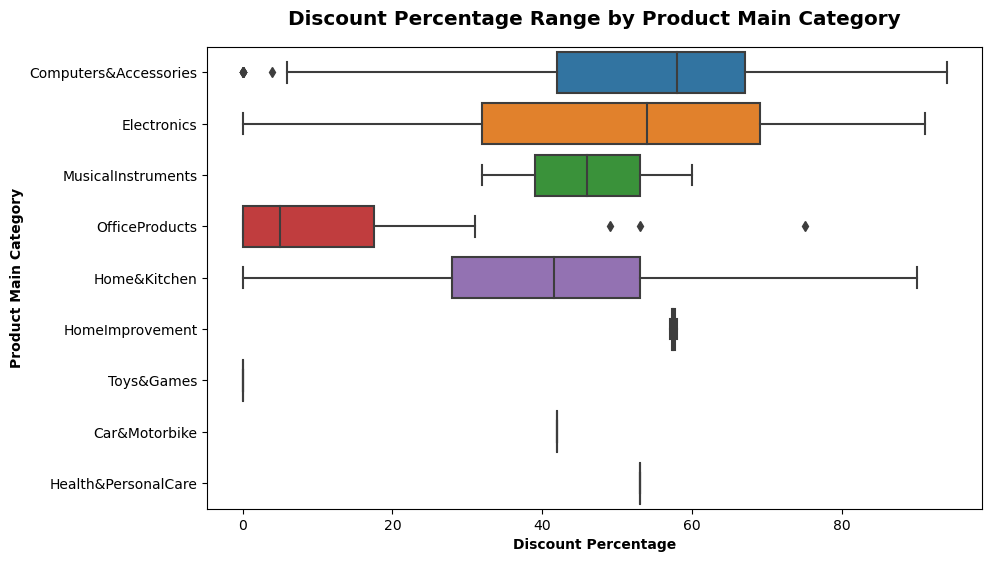

In [98]:
# The Discount Range by Product Main Category

fig, ax = plt.subplots(figsize=(10, 6))

sb.boxplot(data=cleanData2, x='discount_percentage', y='cat1')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Discount Percentage Range by Product Main Category', fontweight='heavy', size='x-large', y=1.03)


plt.show()

### Top 3 main categories with high variance in discount are computers and accessories, electronics and home and kitchen. 

### The median discount percentage range of computer and accessories as well as electronics are above 50%, suggesting that they may be priced much higher than cost price initially

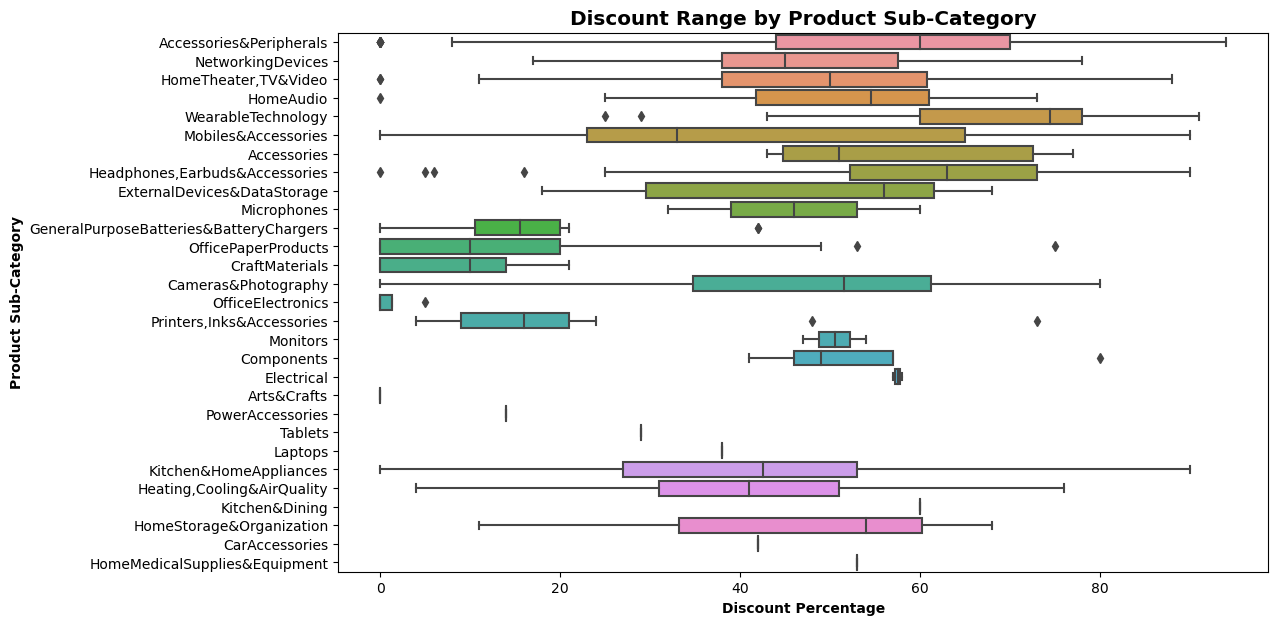

In [99]:

fig, ax = plt.subplots(figsize=(12, 7))

sb.boxplot(data=cleanData2, x='discount_percentage', y='cat2')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Discount Range by Product Sub-Category', fontweight='heavy', size='x-large', y=1)

plt.show()

### We observe that the discount range of electronic items generally have a higher 75th percentile discount percentage than household items. This can again be explained by a higher profit margin of the electronic items.

# EDA for product rating

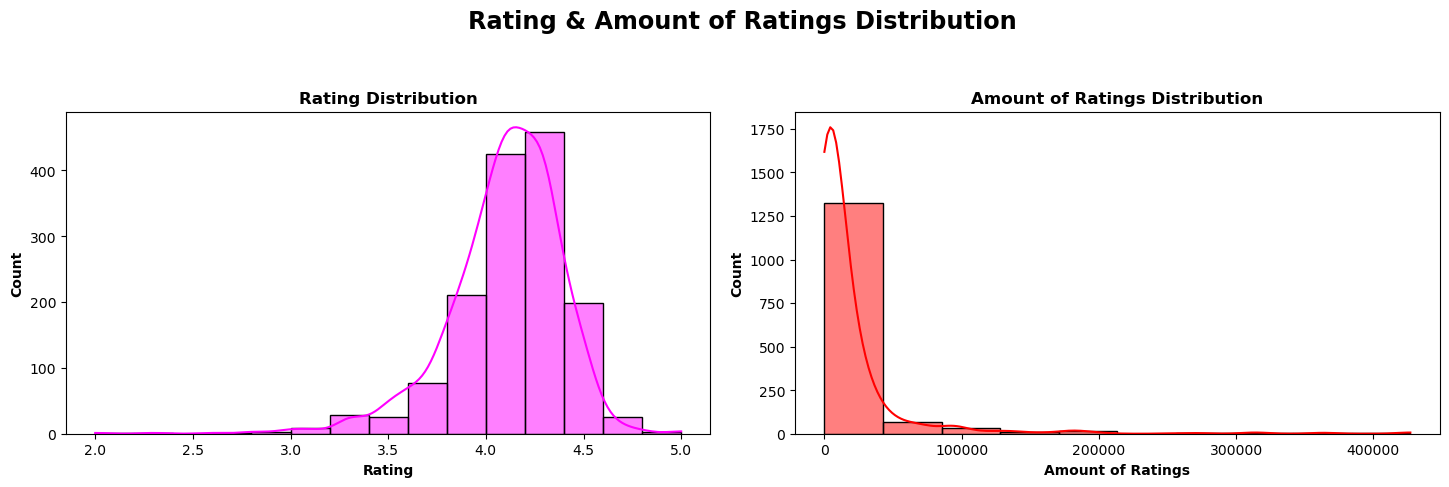

In [100]:
#EDA
#Product Rating

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Rating & Amount of Ratings Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sb.histplot(ax=ax[0], data=cleanData1, x='rating', bins=15, kde=True, color='magenta')
sb.histplot(ax=ax[1], data=cleanData1, x='rating_count', bins=10, kde=True, color='red')

ax[0].set_xlabel('Rating', fontweight='bold')
ax[1].set_xlabel('Amount of Ratings', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Rating Distribution', fontweight='bold')
ax[1].set_title('Amount of Ratings Distribution', fontweight='bold')

plt.show()

### Left skew in the ratings, Most of the project are ranged from 4.0 - 4.375, and there are no products under 2.0.

### The amount of ratings given to a product is very widespread. Most of the products that have been rated, have around 0 - 5000 amount of rating for each product. There are products that have more than 40,000 ratings. The amount of ratings distribution is highly right skewed.

In [101]:
#Creating Categories for Rankings
rating_score = []

for score in cleanData1['rating']:
    if score < 2.0 : rating_score.append('Poor')
    elif score < 3.0 : rating_score.append('Fair')
    elif score < 4.0 : rating_score.append('Good')
    elif score < 5.0 : rating_score.append('Very Good')
    elif score == 5.0 : rating_score.append('Excellent')

cleanData1['rating_score'] = rating_score

cleanData1['rating_score'] = cleanData1['rating_score'].astype('category')
cleanData1['rating_score'] = cleanData1['rating_score'].cat.reorder_categories(['Fair', 'Good', 'Very Good', 'Excellent'], ordered=True)

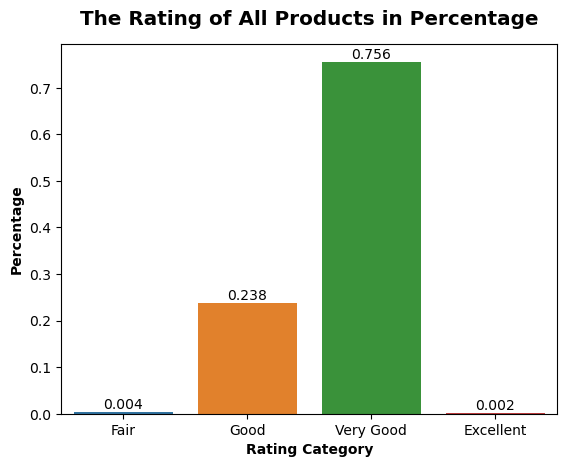

In [102]:
#The Rating of All Products in Percentage

#Noted that there are no products under 2.0 from previous observation, hence, need not include POOR in the chart

rating_ordered = ['Fair', 'Good', 'Very Good', 'Excellent']

rating_count = cleanData1['rating_score'].value_counts(normalize=True).rename_axis('rating').reset_index(name='counts')

rating_count['counts'] = rating_count['counts'].round(3)

rating_count_plot = sb.barplot(data=rating_count, x='rating', y='counts', order=rating_ordered)

rating_count_plot.set_xlabel('Rating Category', fontweight='bold')
rating_count_plot.set_ylabel('Percentage', fontweight='bold')
rating_count_plot.set_title('The Rating of All Products in Percentage', fontweight='heavy', size='x-large', y=1.03)


rating_count_plot.bar_label(rating_count_plot.containers[0])

plt.show()

In [103]:
### Most of the products are very good (75.6%). Very few products rated fair or excellent, and no products rated poor. 

# Visualising review data

In [104]:
from wordcloud import WordCloud

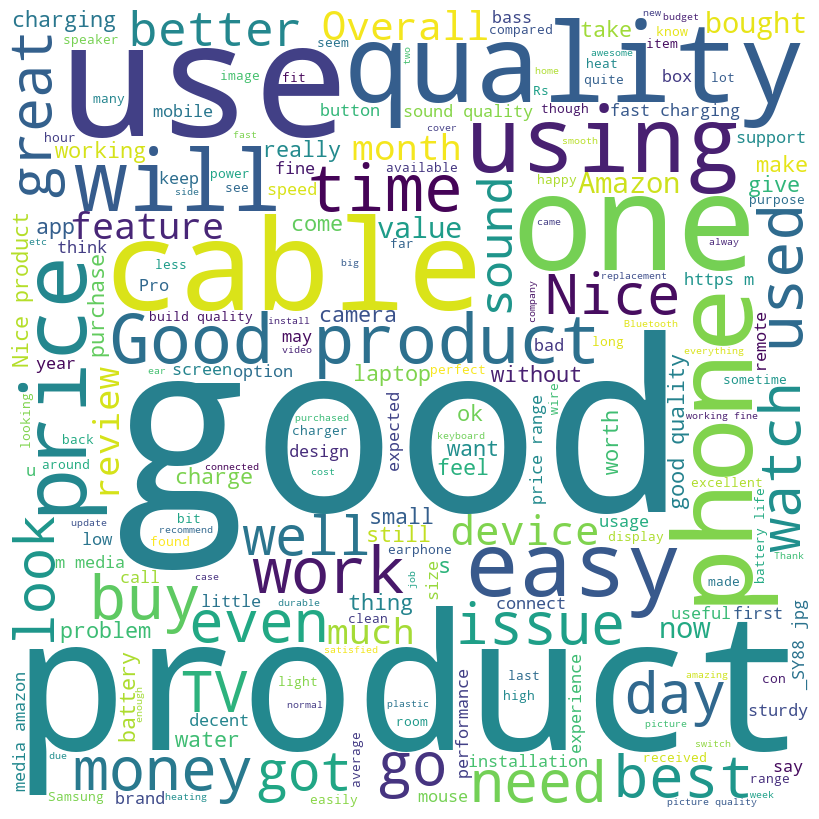

In [105]:
review = ' '.join(cleanData1['review_content'].dropna().values)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(review)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Wordcloud data shows the most popular words in the the reviews, they are mostly positive, which means that Amazon has generally high product satisfaction.

## Recommendation System

In [106]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cleanData1['user_id_encoded'] = le.fit_transform(cleanData1['user_id'])

# Create a new dataframe with the user_id frequency table
freq_table = pd.DataFrame({'User ID': cleanData1['user_id_encoded'].value_counts().index, 'Frequency': cleanData1['user_id_encoded'].value_counts().values})

# Display the dataframe
print(freq_table)
id_example = freq_table.iloc[0,0]
print(id_example)


      User ID  Frequency
0        1048         10
1         623          8
2         674          8
3         254          7
4          88          7
...       ...        ...
1189      429          1
1190      506          1
1191       11          1
1192      900          1
1193      433          1

[1194 rows x 2 columns]
1048


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_products(df, user_id_encoded):
    # Use TfidfVectorizer to transform the product descriptions into numerical feature vectors
    tfidf = TfidfVectorizer(stop_words='english')
    df['about_product'] = df['about_product'].fillna('')  # fill NaN values with empty string
    tfidf_matrix = tfidf.fit_transform(df['about_product'])

    # Get the purchase history for the user
    user_history = df[df['user_id_encoded'] == user_id_encoded]

    # Use cosine_similarity to calculate the similarity between each pair of product descriptions
    # only for the products that the user has already purchased
    indices = user_history.index.tolist()

    if indices:
        # Create a new similarity matrix with only the rows and columns for the purchased products
        cosine_sim_user = cosine_similarity(tfidf_matrix[indices], tfidf_matrix)

        # Create a pandas Series with product indices as the index and product names as the values
        products = df.iloc[indices]['product_name']
        indices = pd.Series(products.index, index=products)

        # Get the indices and similarity scores of products similar to the ones the user has already purchased
        similarity_scores = list(enumerate(cosine_sim_user[-1]))
        similarity_scores = [(i, score) for (i, score) in similarity_scores if i not in indices]

        # Sort the similarity scores in descending order
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

        # Get the indices of the top 5 most similar products
        top_products = [i[0] for i in similarity_scores[1:6]]

        # Get the names of the top 5 most similar products
        recommended_products = df.iloc[top_products]['product_name'].tolist()

        # Get the reasons for the recommendation
        score = [similarity_scores[i][1] for i in range(5)]

        # Create a DataFrame with the results
        results_df = pd.DataFrame({'Id Encoded': [user_id_encoded] * 5,
                                   'recommended product': recommended_products,
                                   'score recommendation': score})

        return results_df

    else:
        print("No purchase history found.")
        return None


In [116]:
recommend_products(cleanData1, 750)

,Id Encoded,recommended product,score recommendation
0,750,"Philips AC1215/20 Air purifier, removes 99.97%...",1.000000
1,750,USHA Quartz Room Heater with Overheating Prote...,0.835217
2,750,"Mi Air Purifier 3 with True HEPA Filter, remov...",0.172714
3,750,Eco Crystal J 5 inch Cartridge (Pack of 2),0.157938
4,750,SaiEllin Room Heater For Home 2000 Watts Room ...,0.156468


### Product purchased by customer before would show a score recommendation of 1.0. The other products will show a different score, depending on their cosine similarity.